<a href="https://colab.research.google.com/github/SatishY21/lastlast/blob/main/Amazon_Sale_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv('Amazon Sale Report.csv',encoding= 'unicode_escape')

In [4]:
df.shape

(28381, 21)

In [5]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [6]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
28376,28375,171-0582346-9241149,04-13-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,L,Shipped,...,INR,259.0,KALYAN,MAHARASHTRA,421301.0,IN,False,NaN,NaN,NaN
28377,28376,402-0562630-1985901,04-13-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XL,Shipped,...,INR,435.0,RANIPETTAI,TAMIL NADU,632404.0,IN,False,Easy Ship,NaN,NaN
28378,28377,407-8525204-2346732,04-13-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,...,INR,342.0,Jaipur,Rajasthan,302021.0,IN,False,NaN,NaN,NaN
28379,28378,407-8525204-2346732,04-13-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,...,INR,435.0,Jaipur,Rajasthan,302021.0,IN,False,NaN,NaN,NaN
28380,28379,171-0079497-7169979,04-13-22,Shippe,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28381 entries, 0 to 28380
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               28381 non-null  int64  
 1   Order ID            28381 non-null  object 
 2   Date                28381 non-null  object 
 3   Status              28381 non-null  object 
 4   Fulfilment          28380 non-null  object 
 5   Sales Channel       28380 non-null  object 
 6   ship-service-level  28380 non-null  object 
 7   Category            28380 non-null  object 
 8   Size                28380 non-null  object 
 9   Courier Status      28380 non-null  object 
 10  Qty                 28380 non-null  float64
 11  currency            26627 non-null  object 
 12  Amount              26627 non-null  float64
 13  ship-city           28368 non-null  object 
 14  ship-state          28368 non-null  object 
 15  ship-postal-code    28368 non-null  float64
 16  ship

In [8]:
#drop unrelated/blank columns
df.drop(['New','PendingS'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28381 entries, 0 to 28380
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               28381 non-null  int64  
 1   Order ID            28381 non-null  object 
 2   Date                28381 non-null  object 
 3   Status              28381 non-null  object 
 4   Fulfilment          28380 non-null  object 
 5   Sales Channel       28380 non-null  object 
 6   ship-service-level  28380 non-null  object 
 7   Category            28380 non-null  object 
 8   Size                28380 non-null  object 
 9   Courier Status      28380 non-null  object 
 10  Qty                 28380 non-null  float64
 11  currency            26627 non-null  object 
 12  Amount              26627 non-null  float64
 13  ship-city           28368 non-null  object 
 14  ship-state          28368 non-null  object 
 15  ship-postal-code    28368 non-null  float64
 16  ship

In [10]:
pd.isnull(df)
# checking null value

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28376,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
28377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28378,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
28379,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [11]:
pd.isnull(df).sum()
# sum will give total values of null values

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,1
Sales Channel,1
ship-service-level,1
Category,1
Size,1
Courier Status,1


In [12]:
df.shape

(28381, 19)

In [13]:
#drop null values
df.dropna(inplace=True)

In [14]:
df.shape

(9695, 19)

In [15]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [16]:
# change data type
df['ship-postal-code']=df['ship-postal-code'].astype('int')

In [17]:
#checking whether the  data type change or not
df['ship-postal-code'].dtype

dtype('int64')

In [18]:
df['Date']=pd.to_datetime (df['Date'])

/tmp/ipython-input-2748755245.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime (df['Date'])


In [19]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [20]:
#rename Columns
df.rename(columns={'Qty':'Quantity'})

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0.0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1.0,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0.0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1.0,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship
12,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1.0,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28353,28352,403-7336125-3400315,2022-04-13,Cancelled,Merchant,Amazon.in,Standard,T-shirt,XXL,On the Way,0.0,INR,894.29,BENGALURU,KARNATAKA,560046,IN,False,Easy Ship
28356,28355,406-5000399-6140328,2022-04-13,Cancelled,Merchant,Amazon.in,Standard,Shirt,XXL,On the Way,0.0,INR,411.43,HYDERABAD,TELANGANA,500049,IN,False,Easy Ship
28365,28364,407-5424914-5922758,2022-04-13,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,Shirt,XL,Shipped,1.0,INR,349.00,Chennai,TAMIL NADU,600002,IN,False,Easy Ship
28375,28374,407-0541398-6322729,2022-04-13,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,Shirt,XL,Shipped,1.0,INR,579.00,BARAMATI,MAHARASHTRA,413133,IN,False,Easy Ship


In [21]:
#describe() method return description of the data in the DataFrame(i.e count,mean,std,min..etc)
df.describe()

,index,Date,Qty,Amount,ship-postal-code
count,9695.000000,9695,9695.000000,9695.000000,9695.000000
mean,14075.201753,2022-04-21 17:00:50.871583232,0.865704,607.620619,457621.987313
min,0.000000,2022-04-13 00:00:00,0.000000,0.000000,110001.000000
25%,7281.500000,2022-04-18 00:00:00,1.000000,419.000000,322768.500000
50%,13931.000000,2022-04-22 00:00:00,1.000000,568.000000,491995.000000
75%,20727.500000,2022-04-26 00:00:00,1.000000,725.000000,600013.000000
max,28376.000000,2022-04-30 00:00:00,5.000000,5495.000000,989898.000000
std,7756.362011,NaN,0.354631,276.123779,197854.471791


In [22]:
df.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,B2B,fulfilled-by
count,9695,9695,9695,9695,9695,9695,9695,9695,9695,9695,9695,9695,9695,9695
unique,8831,7,1,1,1,8,10,2,1,1982,48,1,2,1
top,408-3317403-1729937,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,False,Easy Ship
freq,10,7786,9695,9695,9695,4217,1875,8360,9695,700,1642,9695,9602,9695


In [23]:
#use describe() for specific columns
df[['Qty','Amount']].describe()

,Qty,Amount
count,9695.000000,9695.000000
mean,0.865704,607.620619
std,0.354631,276.123779
min,0.000000,0.000000
25%,1.000000,419.000000
50%,1.000000,568.000000
75%,1.000000,725.000000
max,5.000000,5495.000000


# Exploratory Data Analysis


In [24]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

### size

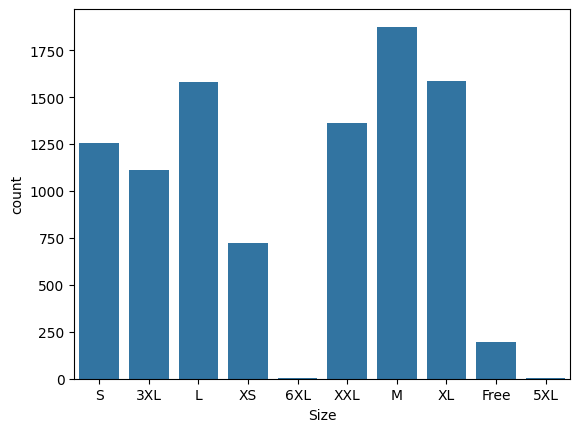

In [25]:
ax=sns.countplot(x='Size' ,data=df)

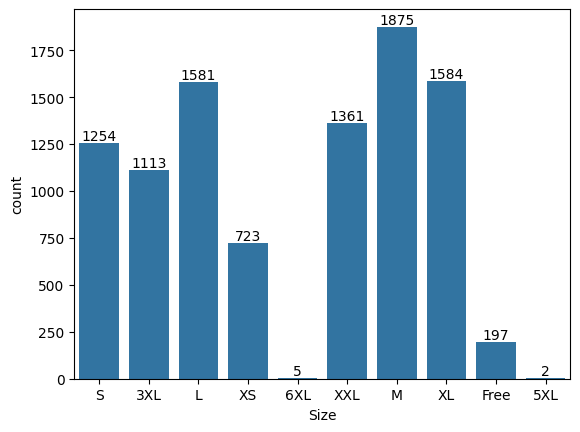

In [26]:
ax=sns.countplot(x='Size' ,data=df)

for bars in ax.containers:
    ax.bar_label(bars)

#### Note: From above Graph you can see that most of the people buys M-Size

# Group By
#### The groupby() function in pandas is used to group data based on one or more columns in a DataFrame

In [27]:
df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

,Size,Qty
5,M,1625.0
4,L,1376.0
7,XL,1366.0
9,XXL,1198.0
6,S,1073.0
0,3XL,995.0
8,XS,587.0
3,Free,169.0
2,6XL,3.0
1,5XL,1.0


<Axes: xlabel='Size', ylabel='Qty'>

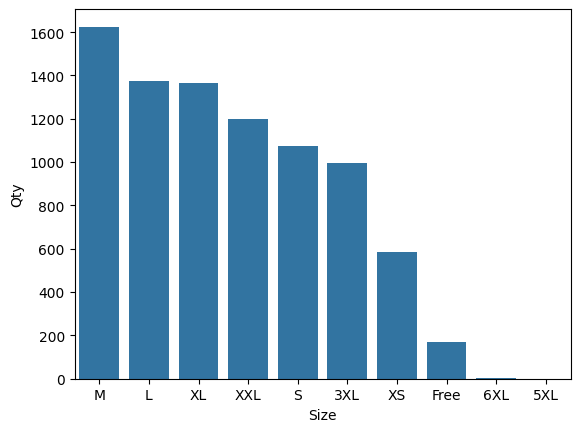

In [28]:
S_Qty=df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

sns.barplot(x='Size',y='Qty', data=S_Qty)


##### Note: From above Graph you can see that most of the Qty buys M-Size in the sales

### Courier Status

<Axes: xlabel='Courier Status', ylabel='count'>

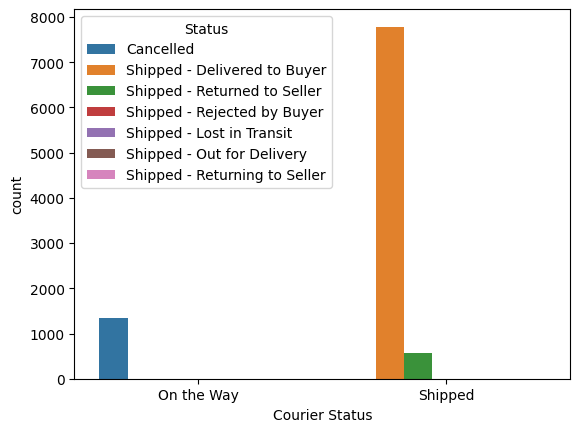

In [29]:
sns.countplot(data=df, x='Courier Status',hue= 'Status')

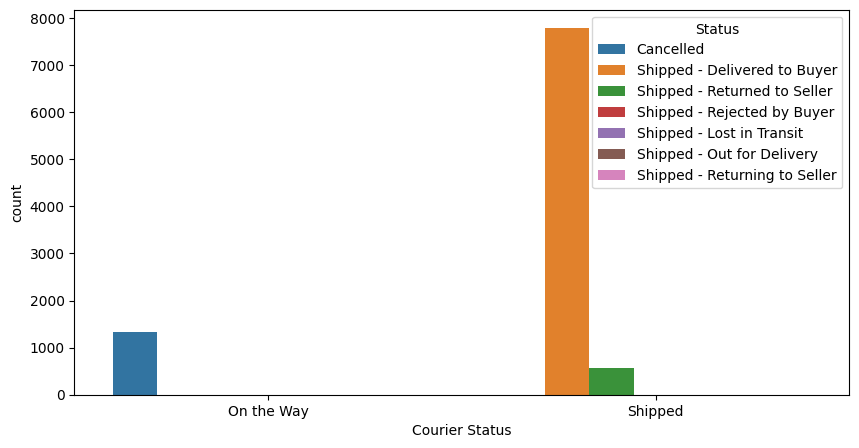

In [30]:
plt.figure(figsize=(10,5))

ax=sns.countplot(data=df, x='Courier Status',hue= 'Status')

plt.show()

##### Note: From above Graph the majority of the orders are shipped through the courier.

<Axes: >

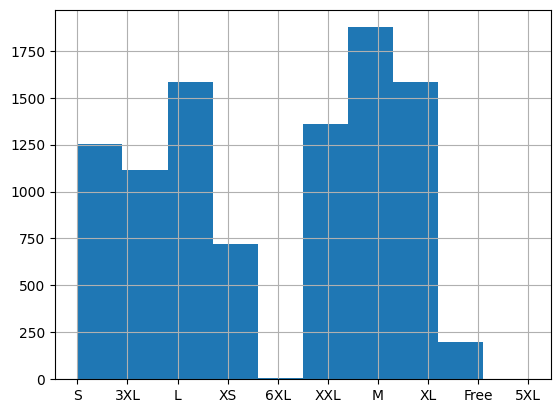

In [31]:
#histogram
df['Size'].hist()

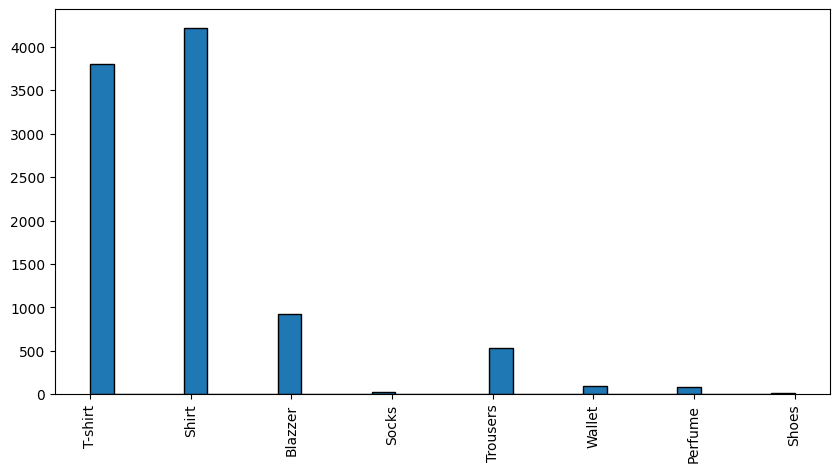

In [32]:
df['Category'] = df['Category'].astype(str)
column_data = df['Category']
plt.figure(figsize=(10, 5))
plt.hist(column_data, bins=30, edgecolor='Black')
plt.xticks(rotation=90)
plt.show()

##### Note: From above Graph you can see that most of the  buyers are T-shirt

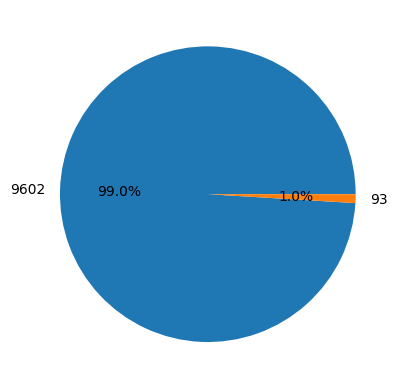

In [33]:
# Checking B2B Data  by using pie chart
B2B_Check = df['B2B'].value_counts()

#  Plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check, autopct='%1.1f%%')
#plt.axis('equal')
plt.show()

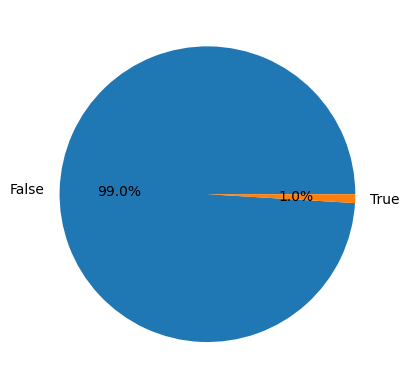

In [34]:
# Checking B2B Data  by using pie chart
B2B_Check = df['B2B'].value_counts()

#  Plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check.index, autopct='%1.1f%%')
#plt.axis('equal')
plt.show()

##### Note : From above chart  we can see that maximum i.e. 99.3% of buyers are retailers and 0.7% are B2B buyers

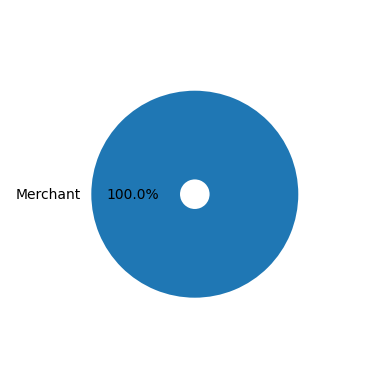

In [35]:
#  Prepare data for pie chart
a1 = df['Fulfilment'].value_counts()

# Step 4: Plot the pie chart
fig, ax = plt.subplots()

ax.pie(a1, labels=a1.index, autopct='%1.1f%%', radius=0.7, wedgeprops=dict(width=0.6))
ax.set(aspect="equal")

plt.show()


##### Note: From above chart you can see that most of the  Fulfilment  are  amazon

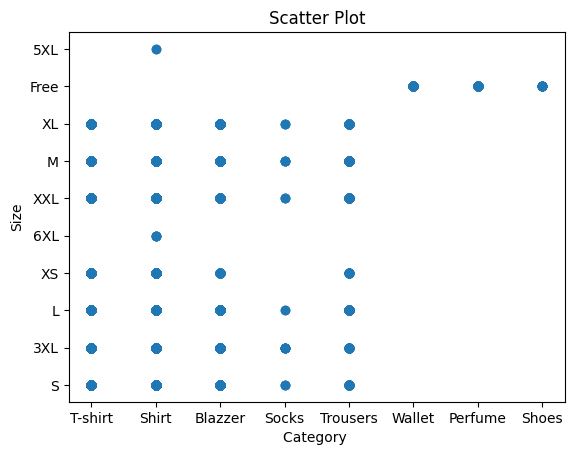

In [36]:
# Prepare data for scatter plot
x_data = df['Category']
y_data = df['Size']

# Plot the scatter plot
plt.scatter(x_data, y_data)
plt.xlabel('Category ')
plt.ylabel('Size')
plt.title('Scatter Plot')
plt.show()


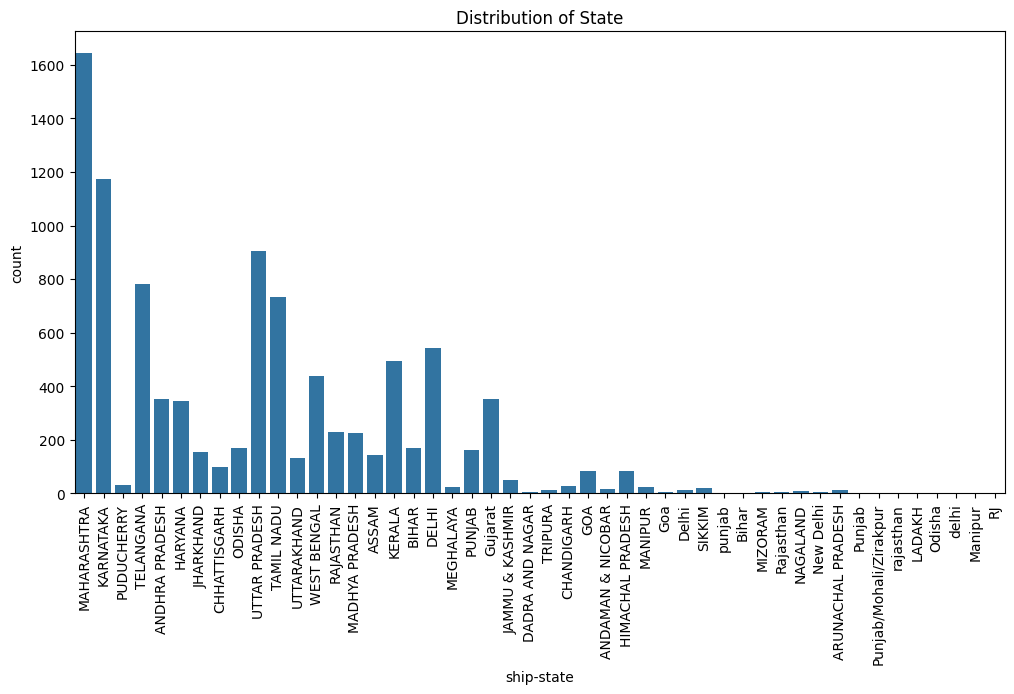

In [37]:


# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()


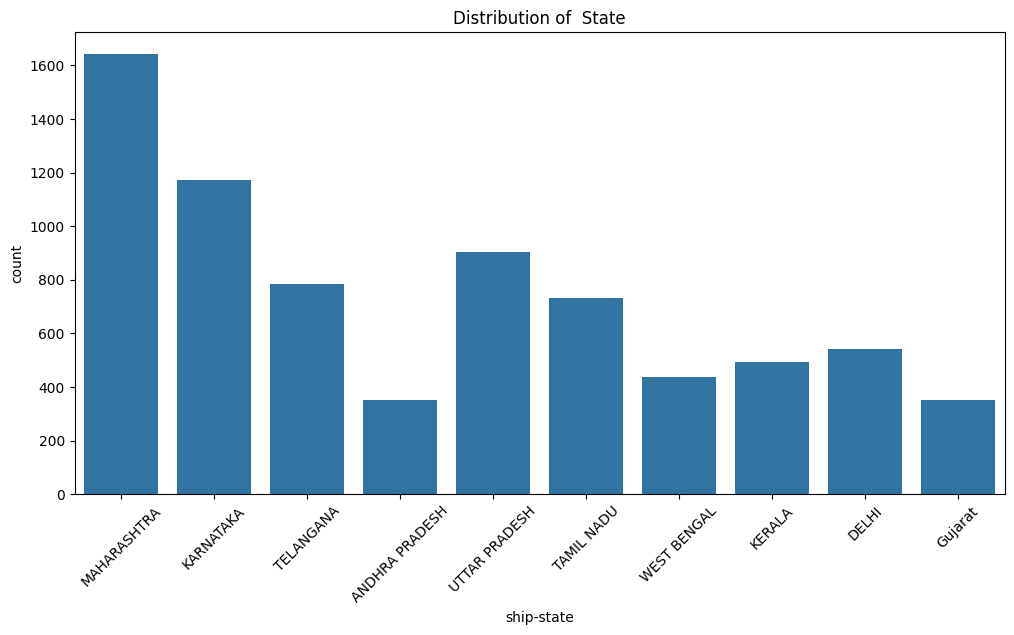

In [38]:
# top_10_States
top_10_state = df['ship-state'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()

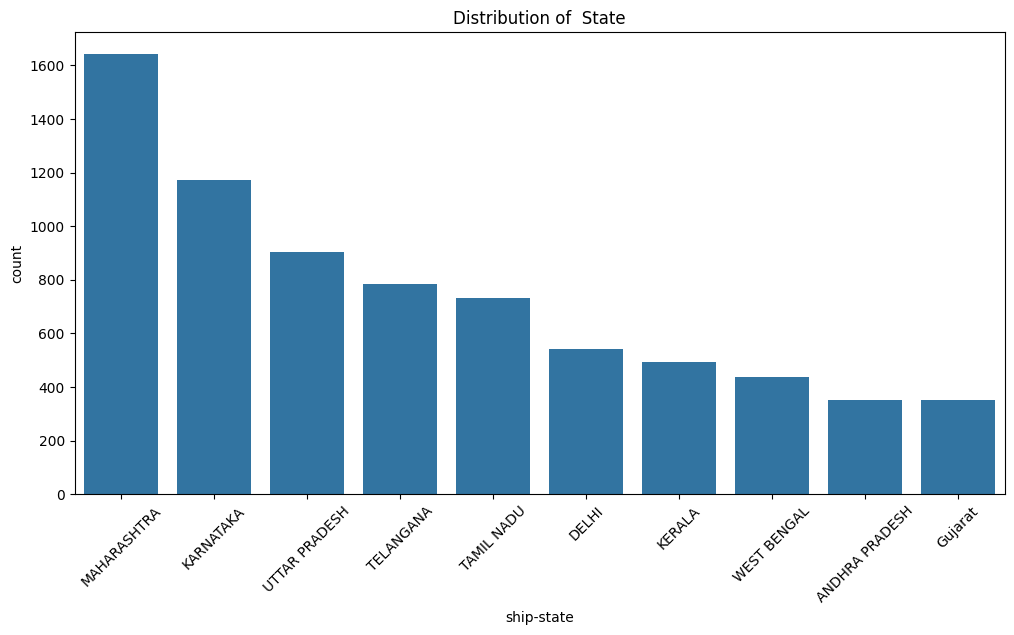

In [40]:
# top_10_States
top_10_state = df['ship-state'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
# Updated code (sorted plot)
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)],
              x='ship-state',
              order=top_10_state.index) # <--- Add this line
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()

#### Note: From above Graph you can see that most of the  buyers are Maharashtra state

### Conclusion

#### The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfills orders through Amazon, experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers.